# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Testing citipy modul
city1 = citipy.nearest_city(22.99, 120.21)
print(city1)
print(city1.city_name)
print(city1.country_code)
# print(weather_api_key)

tainan
tw


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
print(len(cities))
print(cities[0:10])


616
['butaritari', 'madang', 'mataura', 'albany', 'timra', 'anito', 'rikitea', 'touros', 'nizhneyansk', 'zhangye']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).




In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# set up lists to hold reponse info
city_data = []
cloudiness = []
country = []
date = []
humidity =[]
lat = []
lng = []
max_temp = []
wind_speed =[]
count = 0


# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    response = requests.get(query_url + city).json()
    try:
#         pprint(response)

        city_data_v = (response['name'])
        country_v = (response['sys']['country'])
        cloudiness_v = (response['clouds']['all'])
        date_v = (response['dt'])
        humidity_v = (response['main']['humidity'])
        lat_v = (response['coord']['lat'])
        lng_v =(response['coord']['lon'])
        max_temp_v = (response['main']['temp_max'])
        wind_speed_v = (response['wind']['speed'])
        
        city_data.append(city_data_v)
        country.append(country_v)
        cloudiness.append(cloudiness_v)
        date.append(date_v)
        humidity.append(humidity_v)
        lat.append(lat_v)
        lng.append(lng_v)
        max_temp.append(max_temp_v)
        wind_speed.append(wind_speed_v)
    except (KeyError, IndexError):
        count +=1
print(f"Missing field/result... skipping. {count}") 
        
# print(f"city: {city_data}" )
# print(f"country: {country}")
# print(f"cloudiness: {cloudiness}")
# print(f"date: {date}")
# print(f"humidity: {humidity}")
# print(f"lat: {lat}")
# print(f"lng: {lng}")
# print(f"max_temp: {max_temp}")
# print(f"wind_speed: {wind_speed}")

Missing field/result... skipping. 46


In [5]:

print(f"city: {len(city_data)}" )
print(f"country: {len(country)}")
print(f"cloudiness: {len(cloudiness)}")
print(f"date: {len(date)}")
print(f"humidity: {len(humidity)}")
print(f"lat: {len(lat)}")
print(f"lng: {len(lng)}")
print(f"max_temp: {len(max_temp)}")
print(f"wind_speed: {len(wind_speed)}")


city: 570
country: 570
cloudiness: 570
date: 570
humidity: 570
lat: 570
lng: 570
max_temp: 570
wind_speed: 570


In [6]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": city_data,
    "Country" :  country,    
    "Cloudiness": cloudiness,
    "Date":  date,
    "Humidity" : humidity,  
    "Lat" : lat,
    "Lng": lng,
    "Max Temp" :  max_temp,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Butaritari,KI,100,1579881263,76,3.07,172.79,28.77,3.97
1,Madang,PG,86,1579881690,82,-5.22,145.80,28.11,6.49
2,Mataura,NZ,100,1579881259,94,-46.19,168.86,17.78,1.69
3,Albany,US,1,1579881264,58,42.60,-73.97,4.44,1.00
4,Timra,SE,31,1579881452,59,62.49,17.33,3.33,3.60


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_data.to_csv('output.csv')
weather_data.count()

City          570
Country       570
Cloudiness    570
Date          570
Humidity      570
Lat           570
Lng           570
Max Temp      570
Wind Speed    570
dtype: int64

In [8]:
weather_data.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Butaritari,KI,100,1579881263,76,3.07,172.79,28.77,3.97
1,Madang,PG,86,1579881690,82,-5.22,145.80,28.11,6.49
2,Mataura,NZ,100,1579881259,94,-46.19,168.86,17.78,1.69
3,Albany,US,1,1579881264,58,42.60,-73.97,4.44,1.00
4,Timra,SE,31,1579881452,59,62.49,17.33,3.33,3.60


In [9]:
today_date = time.strftime("%x")
today_date

'01/24/20'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [148]:
# OPTIONAL: Create a function to create Linear Regression plots

def linearRegrassionPlot(x_values, y_values, title, xlabel, ylabel, fileName):

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept

        line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'

        plt.scatter(x_values,y_values, marker="o", facecolors="b", edgecolors="r", alpha=0.55)
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq,(x_values.min() , y_values.max()+ 0.05 * y_values.max()),fontsize=14,color="red")

        # To change the size of your pie chart/figure
        fig = plt.gcf()
        fig.set_size_inches(8,5)

        # Creating a title, x label, and y label 
        plt.title(title, fontsize=18, color='purple', alpha=0.85)
        plt.xlabel(xlabel, fontsize=16)
        plt.ylabel(ylabel, fontsize=16)

        # Create x limits of our scatter plot 
        if x_values.max() > 0:
            plt.xlim(x_values.min() - np.absolute(0.05 * x_values.min()) - 5, x_values.max() + 0.05 * x_values.max() + 5)
        else:
            plt.xlim(x_values.min() - np.absolute(0.05 * x_values.min()) - 5, x_values.max() - 0.05 * x_values.max() + 5)

        # Create y limits of our scatter plot
        if y_values.max() > 0:
            plt.ylim(y_values.min() - np.absolute(0.05 * y_values.min()) - 5, y_values.max() + 0.10 * y_values.max() + 5)
        else:
            plt.ylim(y_values.min() - np.absolute(0.05 * y_values.min()) - 5, y_values.max() - 0.10 * y_values.max() + 5)

        print(f"The r-squared is: {rvalue}")
        print(f"The equation of the regression line is: {line_eq}")

        # Save the plotted figures as .pngs
        plt.savefig(fileName + '.png')

        plt.grid()
        plt.show()

The r-squared is: -0.7846949999953128
The equation of the regression line is: y = -0.41x + 19.39


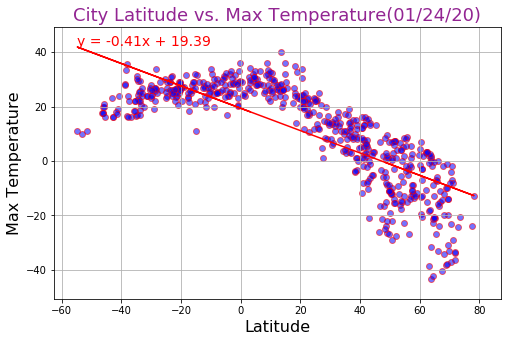

In [149]:
# Latitude vs. Temperature Plot
linearRegrassionPlot(weather_data['Lat'], weather_data['Max Temp'], f'City Latitude vs. Max Temperature({today_date})', 'Latitude', 'Max Temperature', 'City Latitude vs. Max Temperature')



#### Latitude vs. Temperature Plot

The r-squared is: 0.2321915661401497
The equation of the regression line is: y = 0.14x + 70.65


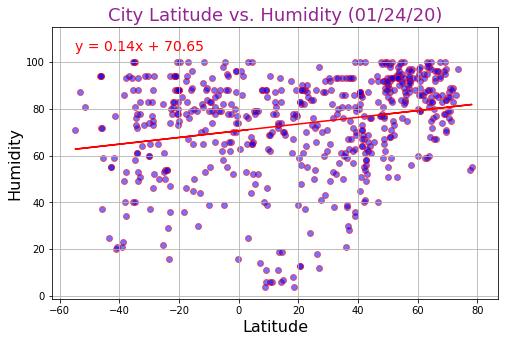

In [150]:
# Latitude vs. Humidity Plot
linearRegrassionPlot(weather_data['Lat'], weather_data['Humidity'], f'City Latitude vs. Humidity ({today_date})', 'Latitude', 'Humidity', 'City Latitude vs. Humidity')


#### Latitude vs. Humidity Plot

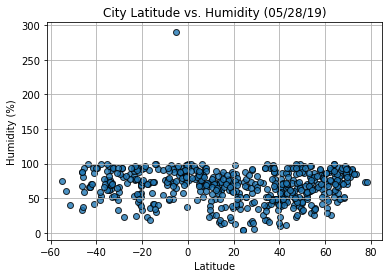

#### Latitude vs. Cloudiness Plot

The r-squared is: 0.09733267000601041
The equation of the regression line is: y = 0.11x + 54.01


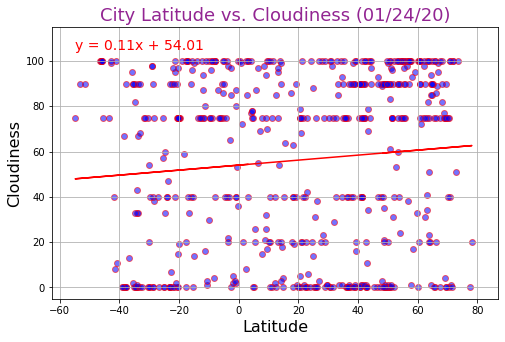

In [151]:
# Latitude vs. Cloudiness Plot
linearRegrassionPlot(weather_data['Lat'], weather_data['Cloudiness'], f'City Latitude vs. Cloudiness ({today_date})', 'Latitude', 'Cloudiness', 'City Latitude vs. Cloudiness')


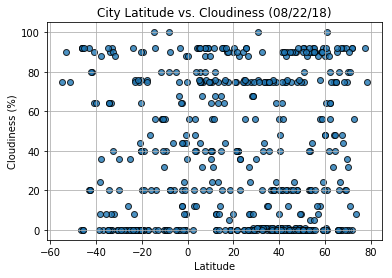

#### Latitude vs. Wind Speed Plot

The r-squared is: -0.11668788867663393
The equation of the regression line is: y = -0.01x + 3.78


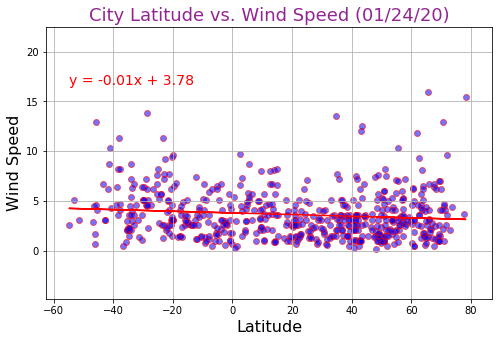

In [152]:
# Latitude vs. Wind Speed Plot
linearRegrassionPlot(weather_data['Lat'], weather_data['Wind Speed'], f'City Latitude vs. Wind Speed ({today_date})', 'Latitude', 'Wind Speed', 'City Latitude vs. Wind Speed')


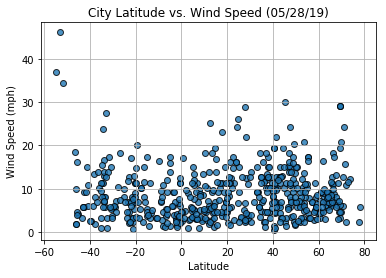

## Linear Regression

In [99]:
# Create Northern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data['Lat']>= 0]
print(northern_hemisphere.shape)
northern_hemisphere.head()

(386, 9)


,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Butaritari,KI,100,1579881263,76,3.07,172.79,28.77,3.97
3,Albany,US,1,1579881264,58,42.60,-73.97,4.44,1.00
4,Timra,SE,31,1579881452,59,62.49,17.33,3.33,3.60
5,Anito,PH,0,1579881690,81,12.45,125.29,27.37,8.05
8,Zhangye,CN,0,1579881551,36,38.93,100.45,-3.26,2.50


In [100]:
# Create Southern Hemisphere DataFrames
southern_hemisphere = weather_data.loc[weather_data['Lat'] < 0]
print(southern_hemisphere.shape)
southern_hemisphere.head()

(184, 9)


,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Madang,PG,86,1579881690,82,-5.22,145.80,28.11,6.49
2,Mataura,NZ,100,1579881259,94,-46.19,168.86,17.78,1.69
6,Rikitea,PF,0,1579881262,74,-23.12,-134.97,25.12,7.67
7,Touros,BR,75,1579881447,58,-5.20,-35.46,31.00,6.20
9,Hobart,AU,99,1579881618,55,-42.88,147.33,16.00,3.10


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8613536759224352
The equation of the regression line is: y = -0.78x + 35.87


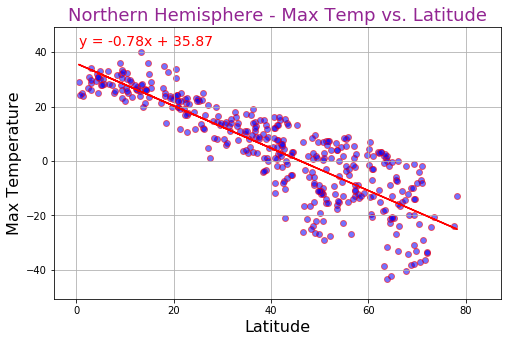

In [153]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
linearRegrassionPlot(northern_hemisphere['Lat'], northern_hemisphere['Max Temp'], 'Northern Hemisphere - Max Temp vs. Latitude', 'Latitude', 'Max Temperature', 'Northern Hemisphere - Max Temp vs. Latitude')


The r-squared is: -0.8151657406810827


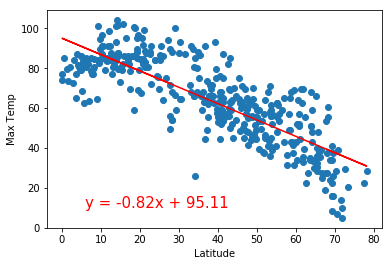

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5043848328746641
The equation of the regression line is: y = 0.18x + 29.03


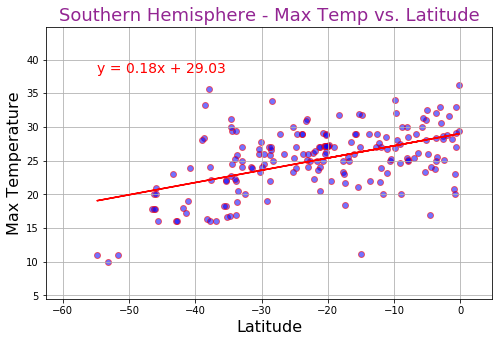

In [154]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
linearRegrassionPlot(southern_hemisphere['Lat'], southern_hemisphere['Max Temp'], 'Southern Hemisphere - Max Temp vs. Latitude', 'Latitude', 'Max Temperature', 'Southern Hemisphere - Max Temp vs. Latitude')


The r-squared is: 0.760263355051646


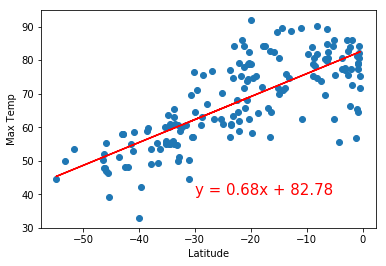

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.40664658619735594
The equation of the regression line is: y = 0.44x + 56.62


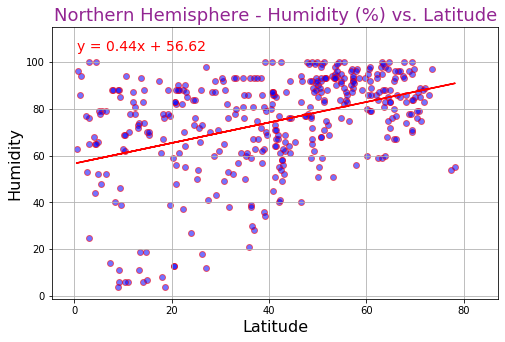

In [155]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
linearRegrassionPlot(northern_hemisphere['Lat'], northern_hemisphere['Humidity'], 'Northern Hemisphere - Humidity (%) vs. Latitude', 'Latitude', 'Humidity', 'Northern Hemisphere - Humidity (%) vs. Latitude')


The r-squared is: 0.10358336015746494


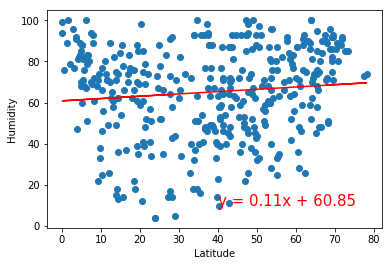

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17827004086042625
The equation of the regression line is: y = 0.27x + 77.77


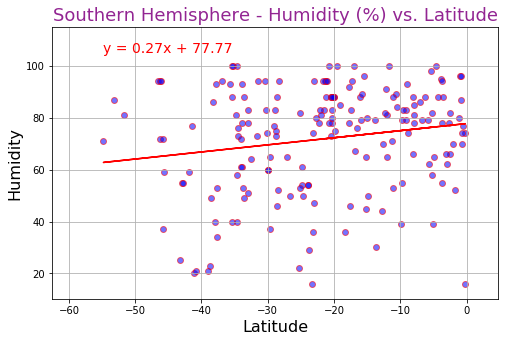

In [156]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
linearRegrassionPlot(southern_hemisphere['Lat'], southern_hemisphere['Humidity'], 'Southern Hemisphere - Humidity (%) vs. Latitude', 'Latitude', 'Humidity', 'Southern Hemisphere - Humidity (%) vs. Latitude')


The r-squared is: 0.14689473425583055


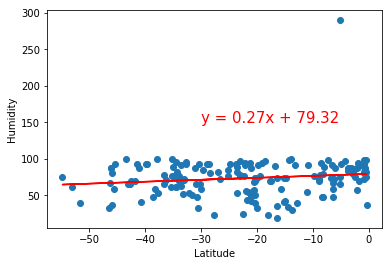

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16537895261526847
The equation of the regression line is: y = 0.32x + 43.78


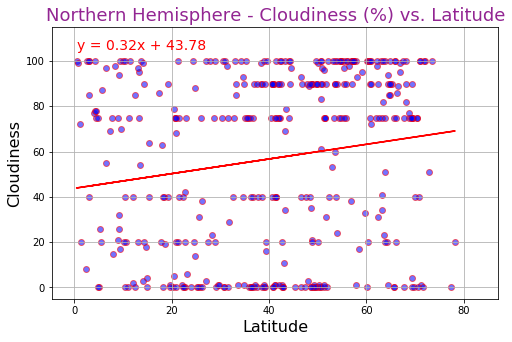

In [157]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
linearRegrassionPlot(northern_hemisphere['Lat'], northern_hemisphere['Cloudiness'], 'Northern Hemisphere - Cloudiness (%) vs. Latitude', 'Latitude', 'Cloudiness', 'Northern Hemisphere - Cloudiness (%) vs. Latitude')


The r-squared is: -0.08733547918934018


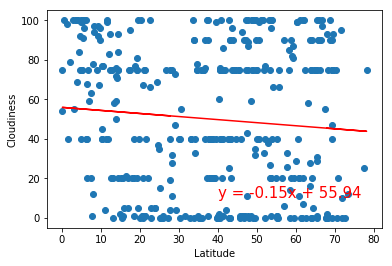

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09422270066533742
The equation of the regression line is: y = 0.27x + 60.83


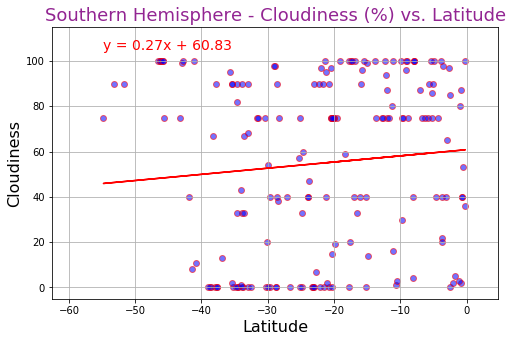

In [158]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
linearRegrassionPlot(southern_hemisphere['Lat'], southern_hemisphere['Cloudiness'], 'Southern Hemisphere - Cloudiness (%) vs. Latitude', 'Latitude', 'Cloudiness', 'Southern Hemisphere - Cloudiness (%) vs. Latitude')


The r-squared is: 0.21881426893991618


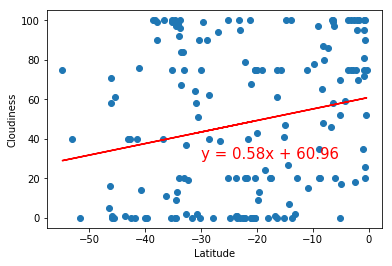

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04405218709405739
The equation of the regression line is: y = 0.01x + 3.2


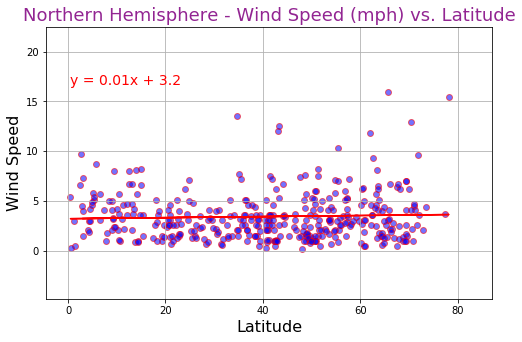

In [160]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
linearRegrassionPlot(northern_hemisphere['Lat'], northern_hemisphere['Wind Speed'], 'Northern Hemisphere - Wind Speed (mph) vs. Latitude', 'Latitude', 'Wind Speed', 'Northern Hemisphere - Wind Speed (mph) vs. Latitude')


The r-squared is: 0.1071382774388479


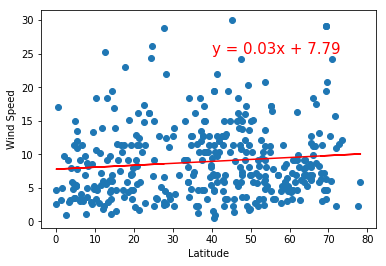

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2785126912199222
The equation of the regression line is: y = -0.05x + 2.91


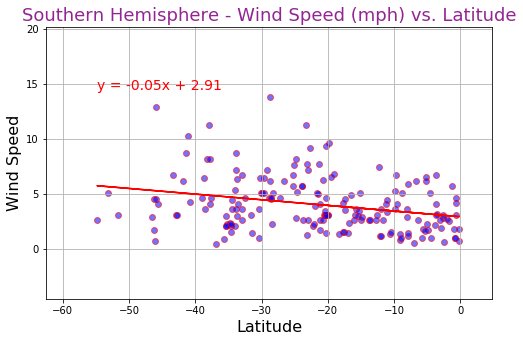

In [161]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
linearRegrassionPlot(southern_hemisphere['Lat'], southern_hemisphere['Wind Speed'], 'Southern Hemisphere - Wind Speed (mph) vs. Latitude', 'Latitude', 'Wind Speed', 'Southern Hemisphere - Wind Speed (mph) vs. Latitude')


The r-squared is: -0.322483077139538


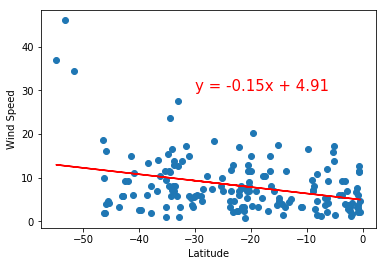